# Computing a corner of a slab of a ball
The indefinite integral is given by
\begin{align}
F(x, r) &= \int^x \int_{y_0}^{\sqrt{r^2-x^2-z_0^2}} \int_{z_0}^{\sqrt{r^2-x^2-y^2}} 1\, dz\, dy\, dx \\
&= \int^x \int_{y_0}^{\sqrt{r^2-x^2-z_0^2}} \left(\sqrt{r^2-x^2-y^2} - z0 \right) dy\, dx \\
&= \int^x \frac{1}{2} \Bigg\{(r-x) (r+x) \left(\cot ^{-1}\left(\frac{z_0}{\sqrt{r^2-x^2-z_0^2}}\right)-\tan ^{-1}\left(\frac{y_0}{\sqrt{r^2-x^2-y_0^2}}\right)\right)- \\
&\qquad \qquad y_0 \sqrt{r^2-x^2-y_0^2}-z_0 \sqrt{r^2-x^2-z_0^2}+2 y_0 z_0\Bigg\} dx \\
\end{align}
If we assume that the indefinte integral will only be evaluated for $0 < x < r$ and that $x \geq 0, y_0\geq0, z_0 \geq 0$, we can write the final result as

\begin{align}
F(x, r) = \frac{1}{6}\bigg(&-2 x \left(y_0 \sqrt{r^2-x^2-y_0^2} + z_0 \sqrt{r^2-x^2-z_0^2} - 3 y_0 z_0\right) +\\
           &r^3 \left(-\alpha_1 + \alpha_2 - \alpha_3 + \alpha_4\right) + 
           \left(3 r^2 x - x^3\right) \left(\alpha_5 - \alpha_6\right) - \\
           &\left(3 r^2 y_0 - y_0^3\right) \alpha_7 - 
           \left(3 r^2 z_0 - z_0^3\right) \alpha_8\bigg) \,,
\end{align}
where
\begin{align}
\alpha_1 &= \tan^{-1} \left( \frac{r(r - x) - y_0^2}{y_0 \sqrt{r^2-x^2-y_0^2}} \right) \quad
\alpha_2 = \tan^{-1} \left( \frac{r(r + x) - y_0^2}{y_0 \sqrt{r^2-x^2-y_0^2}} \right) \\
\alpha_3 &= \tan^{-1} \left( \frac{r(r - x) - z_0^2}{z_0 \sqrt{r^2-x^2-z_0^2}} \right) \quad
\alpha_4 = \tan^{-1} \left( \frac{r(r + x) - z_0^2}{z_0 \sqrt{r^2-x^2-z_0^2}} \right) \\
\alpha_5 &= \tan^{-1} \left( \frac{\sqrt{r^2-x^2-z_0^2}}{z_0} \right) \quad
\alpha_6 = \tan^{-1} \left( \frac{y_0}{\sqrt{r^2-x^2-y_0^2}} \right) \\
\alpha_7 &= \tan^{-1} \left( \frac{x}{\sqrt{r^2-x^2-y_0^2}} \right) \quad
\alpha_8 = \tan^{-1} \left( \frac{x}{\sqrt{r^2-x^2-z_0^2}} \right)
\end{align}

In [1]:
import numpy as np
def my_arctan(num, denom):
        if denom == 0:
            return np.sign(num)*0.5*np.pi
        else:
            return np.arctan(num/denom)

def indefinite_integral_simple(x, y0, z0, r):
    arg_sqz0 = r**2 - x**2 - z0**2
    sqz0 = np.sqrt(arg_sqz0) if arg_sqz0 > 0 else 0.
    arg_sqy0 = r**2 - x**2 - y0**2
    sqy0 = np.sqrt(arg_sqy0) if arg_sqy0 > 0 else 0.
    at1 = my_arctan(r*(r - x) - y0**2, sqy0*y0)
    at2 = my_arctan(r*(r + x) - y0**2, sqy0*y0)
    at3 = my_arctan(r*(r - x) - z0**2, sqz0*z0)
    at4 = my_arctan(r*(r + x) - z0**2, sqz0*z0)
    at5 = my_arctan(sqz0, z0)
    at6 = my_arctan(y0, sqy0)
    at7 = my_arctan(x,  sqy0)
    at8 = my_arctan(x,  sqz0)
    res = (-2*x*(sqy0*y0 + sqz0*z0 - 3*y0*z0) - 
           r**3*(at1 - at2 + at3 - at4) +
           (3*r**2*x - x**3)*(at5 - at6) - 
           (3*r**2*y0 - y0**3)*at7 - 
           (3*r**2*z0 - z0**3)*at8)/6.
    return res

def indefinite_integral_with_fewer_arctans(x, y0, z0, r):
    argsqy0 = r**2 - x**2 - y0**2
    sqy0 = np.sqrt(argsqy0) if argsqy0 > 0 else 0.
    argsqz0 = r**2 - x**2 - z0**2
    sqz0 = np.sqrt(argsqz0) if argsqz0 > 0 else 0.
    apy = r*(r + x) - y0**2
    apz = r*(r + x) - z0**2
    by = sqy0*y0
    bz = sqz0*z0
    sgn1 = 1 if by >= 0 else -1
    sgn2 = 1 if bz >= 0 else -1

    if y0 != 0 and z0 != 0 and x != 0:
        u1 = (apy - 2*r*x)/by
        v1 = by/apy
        u2 = (apz - 2*r*x)/bz
        v2 = bz/apz
        u = (u1 + v1)/(1 - u1*v1)
        v = (u2 + v2)/(1 - u2*v2)
        at1234 = -0.5*np.pi*(sgn1 + sgn2) + my_arctan((u + v), (1 - u*v)) + (u*v > 1)*np.pi
    else:
        at1 = my_arctan(apy - 2*r*x, by)
        at2 = my_arctan(by, apy)
        at3 = my_arctan(apz - 2*r*x, bz)
        at4 = my_arctan(bz, apz)
        at1234 = -0.5*np.pi*(sgn1 + sgn2) + at1 + at2 + at3 + at4
    
    at56 = my_arctan(sqy0*sqz0 - y0*z0, sqz0*y0 + sqy0*z0)
    at7 = my_arctan(x,  sqy0)
    at8 = my_arctan(x,  sqz0)
    
    res = (-2*x*(sqy0*y0 + sqz0*z0 - 3*y0*z0) - 
           r**3*at1234 +
           (3*r**2*x - x**3)*at56 - 
           (3*r**2*y0 - y0**3)*at7 - 
           (3*r**2*z0 - z0**3)*at8)/6.
    return res

def indefinite_integral_with_arctan2_and_no_powers(x, y0, z0, r):
    r2 = r*r
    x2 = x*x
    x3 = x2*x
    x4 = x2*x2  
    y02 = y0*y0
    y03 = y02*y0
    z02 = z0*z0
    z03 = z02*z0
    argsqy0 = r2 - x2 - y02
    sqy0 = np.sqrt(argsqy0) if argsqy0 > 0 else 0.
    argsqz0 = r2 - x2 - z02
    sqz0 = np.sqrt(argsqz0) if argsqz0 > 0 else 0.
    
    if y0 > 0 or z0 > 0:
        xx = x4*y02*z02 + r2*(r2*(x4 + y02*z02 + r2*(r2 - 2*x2 - y02 - z02)) + 
                              x2*(x2*(y02 + z02) + y0*(-4*sqy0*sqz0*z0 + 2*y0*z02)))
        yy = r*(-2*sqz0*x3*y02*z0 - 2*sqy0*x3*y0*z02 + 
                r2*(r2*(2*sqy0*x*y0 + 2*sqz0*x*z0) + 
                    x*(-2*sqz0*x2*z0 - 2*sqz0*y02*z0) + 
                    sqy0*x*(-2*x2*y0 - 2*y0*z02)))
        at1234 = -np.arctan2(yy, xx)
    else:
        at1234 = -np.pi if x == r else 0
    at56 = np.arctan2(sqy0*sqz0 - y0*z0, sqz0*y0 + sqy0*z0)
    at7 = np.arctan2(x,  sqy0)
    at8 = np.arctan2(x,  sqz0)
    
    res = (-2*x*(sqy0*y0 + sqz0*z0 - 3*y0*z0) - 
           r**3*at1234 +
           (3*r2*x - x3)*at56 - 
           (3*r2*y0 - y03)*at7 - 
           (3*r2*z0 - z03)*at8)/6.
    return res

In [2]:
def corner_of_a_slab(x0, y0, z0, r, dx):
    #indefinite_integral = indefinite_integral_simple
    #indefinite_integral = indefinite_integral_with_fewer_arctans
    indefinite_integral = indefinite_integral_with_arctan2_and_no_powers 
    d2min = x0**2 + y0**2 + z0**2
    if (d2min > r**2):
        return 0.
    x0i = max(x0     , -np.sqrt(r**2 - y0**2 - z0**2))
    x0t = min(x0 + dx,  np.sqrt(r**2 - y0**2 - z0**2))
    return indefinite_integral(x0t, y0, z0, r) - indefinite_integral(x0i, y0, z0, r)
    return indefinite_integral(x0t, y0, z0, r) - indefinite_integral(x0i, y0, z0, r)

def ball_cuboid_intersection(x0, y0, z0, dx, dy, dz, r):
    if x0 < 0 and (x0 + dx) < 0:
        x0 = -(x0 + dx)
    if y0 < 0 and (y0 + dy) < 0:
        y0 = -(y0 + dy)
    if z0 < 0 and (z0 + dz) < 0:
        z0 = -(z0 + dz)
    if x0 < 0 and (x0 + dx) > 0:
        I_pos = ball_cuboid_intersection(0, y0, z0, x0 + dx, dy, dz, r)
        I_neg = ball_cuboid_intersection(0, y0, z0, -x0, dy, dz, r)
        return I_pos + I_neg
    if y0 < 0 and (y0 + dy) > 0:
        I_pos = ball_cuboid_intersection(x0, 0, z0, dx, y0 + dy, dz, r)
        I_neg = ball_cuboid_intersection(x0, 0, z0, dx, -y0, dz, r)
        return I_pos + I_neg
    if z0 < 0 and (z0 + dz) > 0:
        I_pos = ball_cuboid_intersection(x0, y0, 0, dx, dy, z0 + dz, r)
        I_neg = ball_cuboid_intersection(x0, y0, 0, dx, dy, -z0, r)
        return I_pos + I_neg
    
    d2min = x0**2 + y0**2 + z0**2
    d2max = (x0 + dx)**2 + (y0 + dy)**2 + (z0 + dz)**2
    if d2max < r**2:
        return dx*dy*dz
    elif d2min > r**2:
        return 0.
    else:
        res = (corner_of_a_slab(x0, y0     , z0     , r, dx) - 
               corner_of_a_slab(x0, y0 + dy, z0     , r, dx) - 
               corner_of_a_slab(x0, y0     , z0 + dz, r, dx) +
               corner_of_a_slab(x0, y0 + dy, z0 + dz, r, dx))
        return res

In [3]:
%%time
r = 26.
kabsmax = int(np.ceil(r))
V_analytical = 4./3.*np.pi*r**3
V_numerical = 0
for i in range(-kabsmax, kabsmax + 1):
    for j in range(-kabsmax, kabsmax + 1):
        for k in range(-kabsmax, kabsmax + 1):
            t = ball_cuboid_intersection(i - 0.5, j - 0.5, k - 0.5, 1., 1., 1., r)
            V_numerical += t
print(V_analytical)
print(V_numerical)

73622.1766393256
73622.17663932547
CPU times: user 1.21 s, sys: 2.95 ms, total: 1.21 s
Wall time: 1.21 s


In [4]:
%load_ext cython

In [5]:
%%cython -a
cimport cython
from libc.math cimport sqrt, atan2, M_PI
cpdef double indefinite_integral_cython(double x, double y0, double z0, double r):
    cdef double r2, x2, x3, x4, y02, y03, z02, z03, sqy0, sqz0, xx, yy, at1234, at56, at7, at8, res, argsqy0, argsqz0
    r2 = r*r
    x2 = x*x
    x3 = x2*x
    x4 = x2*x2  
    y02 = y0*y0
    y03 = y02*y0
    z02 = z0*z0
    z03 = z02*z0
    argsqy0 = r2 - x2 - y02
    sqy0 = sqrt(argsqy0*(argsqy0 > 0))
    argsqz0 = r2 - x2 - z02
    sqz0 = sqrt(argsqz0*(argsqz0 > 0))
    
    if (y0 > 0) | (z0 > 0):
        xx = x4*y02*z02 + r2*(r2*(x4 + y02*z02 + r2*(r2 - 2*x2 - y02 - z02)) + 
                              x2*(x2*(y02 + z02) + y0*(-4*sqy0*sqz0*z0 + 2*y0*z02)))
        yy = r*(-2*sqz0*x3*y02*z0 - 2*sqy0*x3*y0*z02 + 
                r2*(r2*(2*sqy0*x*y0 + 2*sqz0*x*z0) + x*(-2*sqz0*x2*z0 - 2*sqz0*y02*z0) + 
                    sqy0*x*(-2*x2*y0 - 2*y0*z02)))
        at1234 = -atan2(yy, xx)
    else:
        at1234 = (-M_PI)*(x == r)
    at56 = atan2(sqy0*sqz0 - y0*z0, sqz0*y0 + sqy0*z0)
    at7 = atan2(x,  sqy0)
    at8 = atan2(x,  sqz0)
    
    res = (-2*x*(sqy0*y0 + sqz0*z0 - 3*y0*z0) - 
           r**3*at1234 +
           (3*r2*x - x3)*at56 - 
           (3*r2*y0 - y03)*at7 - 
           (3*r2*z0 - z03)*at8)/6.
    return res

cpdef double corner_of_a_slab_cython(double x0, double y0, double z0, double r, double dx):
    cdef double d2min, x0i, x0t, y02, z02, r2
    y02 = y0*y0
    z02 = z0*z0
    r2 = r*r
    d2min = x0*x0 + y02 + z02
    if (d2min > r2):
        return 0.
    x0i = max(x0     , -sqrt(r2 - y02 - z02))
    x0t = min(x0 + dx,  sqrt(r2 - y02 - z02))
    return indefinite_integral_cython(x0t, y0, z0, r) - indefinite_integral_cython(x0i, y0, z0, r)

cpdef double ball_cuboid_intersection_cython(double x0, double y0, double z0, double dx, double dy, double dz, double r):
    cdef double I_pos, I_neg, d2min, d2max
    if x0 < 0 and (x0 + dx) < 0:
        x0 = -(x0 + dx)
    if y0 < 0 and (y0 + dy) < 0:
        y0 = -(y0 + dy)
    if z0 < 0 and (z0 + dz) < 0:
        z0 = -(z0 + dz)
    if x0 < 0 and (x0 + dx) > 0:
        I_pos = ball_cuboid_intersection_cython(0, y0, z0, x0 + dx, dy, dz, r)
        I_neg = ball_cuboid_intersection_cython(0, y0, z0, -x0, dy, dz, r)
        return I_pos + I_neg
    if y0 < 0 and (y0 + dy) > 0:
        I_pos = ball_cuboid_intersection_cython(x0, 0, z0, dx, y0 + dy, dz, r)
        I_neg = ball_cuboid_intersection_cython(x0, 0, z0, dx, -y0, dz, r)
        return I_pos + I_neg
    if z0 < 0 and (z0 + dz) > 0:
        I_pos = ball_cuboid_intersection_cython(x0, y0, 0, dx, dy, z0 + dz, r)
        I_neg = ball_cuboid_intersection_cython(x0, y0, 0, dx, dy, -z0, r)
        return I_pos + I_neg
    
    d2min = x0**2 + y0**2 + z0**2
    d2max = (x0 + dx)**2 + (y0 + dy)**2 + (z0 + dz)**2
    if d2max < r**2:
        return dx*dy*dz
    elif d2min > r**2:
        return 0.
    else:
        res = (corner_of_a_slab_cython(x0, y0     , z0     , r, dx) - 
               corner_of_a_slab_cython(x0, y0 + dy, z0     , r, dx) - 
               corner_of_a_slab_cython(x0, y0     , z0 + dz, r, dx) +
               corner_of_a_slab_cython(x0, y0 + dy, z0 + dz, r, dx))
        return res

In [6]:
%%time
r = 26.
kabsmax = int(np.ceil(r))
V_analytical = 4./3.*np.pi*r**3
V_numerical = 0
for i in range(-kabsmax, kabsmax + 1):
    for j in range(-kabsmax, kabsmax + 1):
        for k in range(-kabsmax, kabsmax + 1):
            t = ball_cuboid_intersection_cython(i - 0.5, j - 0.5, k - 0.5, 1., 1., 1., r)
            V_numerical += t
print(V_analytical)
print(V_numerical)

73622.1766393256
73622.17663932547
CPU times: user 63.7 ms, sys: 1.99 ms, total: 65.7 ms
Wall time: 65.8 ms


CPU times: user 3.27 s, sys: 26.3 ms, total: 3.3 s
Wall time: 3.3 s


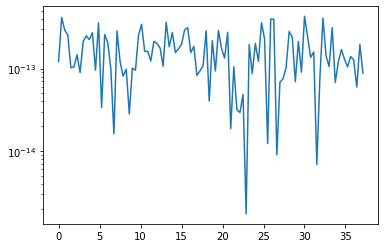

In [7]:
%%time
Nx = 13
Ny = 171
Nz = 37
relerr = []
rvec = np.linspace(1e-3, 37.13, 100)
for r in rvec:
    xvec = np.linspace(-1.1*r, 1.2*r, Nx)
    yvec = np.linspace(-1.11*r, 2.3*r, Ny)
    zvec = np.linspace(-1.21*r, 1.05*r, Nz)
    dx = (xvec[-1] - xvec[0])/(Nx - 1)
    dy = (yvec[-1] - yvec[0])/(Ny - 1)
    dz = (zvec[-1] - zvec[0])/(Nz - 1)
    
    Vanal = 4./3.*np.pi*r**3
    Vnum = 0
    for x in xvec:
        for y in yvec:
            for z in zvec:
                t = ball_cuboid_intersection_cython(x, y, z, dx, dy, dz, r)
                Vnum += t
    relerr.append((Vnum - Vanal) / Vanal)
import matplotlib.pyplot as plt
plt.semilogy(rvec, np.abs(relerr))